# Introduction to Chatbots

A chatbot is a software application that provides customer support via text or voice in place of a live human agent. Today, almost all the major customer-facing companies use chatbots for providing better customer service. The chatbot is broadly classified into two types:

1. **Text-based**: A text-based chatbot is one that interacts and communicates with texts. Eg: Customer support assistant, etc.

2. **Voice-based**: A voice-based chatbot also known as text to speech chatbot uses pre-recorded answers and text-to-speech capabilities to support customers. Eg: Alexa, Siri, etc. 


**Text-based** chatbots are further classified into two types:

1. **Rule-based**: In Rule-based chatbots, the bots are trained on some predefined rules and it is able to answer the queries based on that only. These are generally faster to train and are more accountable and secure. As these are trained on predefined rules, it takes a lot of manual effort to prepare rules for training these chatbots.

2. **Self-learn or AI (Artificial Intelligence) based**: In Self-learn or AI-based chatbots, the bots are trained to simulate human-like conversational capabilities using Natural Language Processing (NLP). These provide better customer engagement and in turn increase lead generations. To achieve, human-like conversational capabilities, these are slightly difficult to train and require high computational resources.


**Industries using AI chatbots**

Top industries using chatbots are as follows-

1. Healthcare
2. Telecommunications
3. Banking
4. Financial Advice
5. Insurance
6. Government


# Building a Neural network based chatbot in Python

Given below are the steps followed for building an AI-based chatbot in Python:

1. Download necessary libraries
2. Importing dependencies
3. Creating an intents JSON file
4. Preprocessing the data
5. Building our Neural network model
6. Training the model
7. Building useful features

**Download necessary libraries**



*   [nltk](https://www.nltk.org/) module is used for  text processing for tokenization, parsing, classification, stemming, tagging, and semantic reasoning.



In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing dependencies**

In [2]:
import json
import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout

nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Creating an intents JSON file**

Intent JSON file will contain certain intentions of the user during interaction with our chatbot. Intentions here means the intent of the user i.e. the user might want to know the name or age of the chatbot. To set up these intentions we will create a set of tags that will contain the set of users' queries and chatbots' responses. 


For eg: Suppose users want to know the age of the chatbot then they can ask these sets of  questions: 

`[how old are you?", "when is your birthday?", "when was you born?"]`


The chatbot can respond in any of the below ways possible:

`["I am 24 years old", "I was born in 1996", "My birthday is July 3rd and I was born in 1996", "03/07/1996"]`

So we will create a tag named "age" and will add these questions and responses inside it. It will look like this in JSON format:

```
{"tag": "age",
              "patterns": ["how old are you?", "when is your birthday?", "when was you born?"],
              "responses": ["I am 24 years old", "I was born in 1996", "My birthday is July 3rd and I was born in 1996", "03/07/1996"]
             }*
```



Similarly, for each set of intentions or tags, we will have a set of both queries and responses. These patterns will be used by our chatbot during training so that it can adapt to the different ways of questions asked for a particular response. Therefore, users wouldn't have to use the exact queries on which the chatbot was trained. 
The chatbot would not adapt to the responses though which means it will only answer the queries selected from the list of responses at random. 


In [3]:
# used a dictionary to represent an intents JSON file
data = {"intents": [
             {"tag": "greeting",
              "patterns": ["Hello", "How are you?", "Hi there", "Hi", "Whats up"],
              "responses": ["Howdy Partner!", "Hello", "How are you doing?", "Greetings!", "How do you do?"],
             },
             {"tag": "age",
              "patterns": ["how old are you?", "when is your birthday?", "when was you born?"],
              "responses": ["I am 24 years old", "I was born in 1996", "My birthday is July 3rd and I was born in 1996", "03/07/1996"]
             },
             {"tag": "date",
              "patterns": ["what are you doing this weekend?",
"do you want to hang out some time?", "what are your plans for this week"],
              "responses": ["I am available all week", "I don't have any plans", "I am not busy"]
             },
             {"tag": "name",
              "patterns": ["what's your name?", "what are you called?", "who are you?"],
              "responses": ["My name is Kippi", "I'm Kippi", "Kippi"]
             },
             {"tag": "goodbye",
              "patterns": [ "bye", "g2g", "see ya", "adios", "cya"],
              "responses": ["It was nice speaking to you", "See you later", "Speak soon!"]
             }
]}

**Preprocessing the data**

There are a few things we need to do before creating our training data. Here is the list:

1. Create a vocabulary of all of the words used in the patterns (recall the patterns are the queries posed by the user)
2.Create a list of the classes — This is simply the tags of each intent

3. Create a list of all the patterns within the intents file
4. Create a list of all the associated tags to go with each pattern in the intents file


In [4]:
# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

You can learn about Lemmatization [here](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html).


In [5]:

# Each list to create
words = []
classes = []
doc_X = []
doc_y = []
# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_X.append(pattern)
        doc_y.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

Here we created 4 lists output of each is give below:

In [6]:
words

["'s",
 'adios',
 'are',
 'birthday',
 'born',
 'bye',
 'called',
 'cya',
 'do',
 'doing',
 'for',
 'g2g',
 'hang',
 'hello',
 'hi',
 'how',
 'is',
 'name',
 'old',
 'out',
 'plan',
 'see',
 'some',
 'there',
 'this',
 'time',
 'to',
 'up',
 'wa',
 'want',
 'week',
 'weekend',
 'what',
 'whats',
 'when',
 'who',
 'ya',
 'you',
 'your']

In [7]:
classes

['age', 'date', 'goodbye', 'greeting', 'name']

In [8]:
doc_X

['Hello',
 'How are you?',
 'Hi there',
 'Hi',
 'Whats up',
 'how old are you?',
 'when is your birthday?',
 'when was you born?',
 'what are you doing this weekend?',
 'do you want to hang out some time?',
 'what are your plans for this week',
 "what's your name?",
 'what are you called?',
 'who are you?',
 'bye',
 'g2g',
 'see ya',
 'adios',
 'cya']

In [9]:
doc_y

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'age',
 'age',
 'age',
 'date',
 'date',
 'date',
 'name',
 'name',
 'name',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye']

Now that we’ve separated our data, we are now ready to train our algorithm. However, Neural Networks expect numerical values, and not words, to be fed into them, therefore, we first have to process our data so that a neural network could read what we are doing.

In order to convert our data to numerical values, we are going to leverage a technique called bag of words. For more information on cleaning text and representing text as numerical values, check out my 2 posts that detail these techniques and how to perform them in Python.

In [10]:
# list for training data
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [11]:
train_X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
train_y

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

**Building our Neural network model**

In [13]:
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])

print("input shape:", input_shape )
print("output_shape:", output_shape )

input shape: (39,)
output_shape: 5


In [15]:
# the deep learning model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation = "softmax"))
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5120      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                

**Training the model**

In [16]:
history = model.fit(x=train_X, y=train_y, 
                    epochs=200) 

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 1.6260 - accuracy: 0.3158
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 1.5775 - accuracy: 0.3684
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 1.5985 - accuracy: 0.1053
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 1.6064 - accuracy: 0.2105
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 1.5363 - accuracy: 0.3684
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 1.5912 - accuracy: 0.3158
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 1.5356 - accuracy: 0.3684
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 1.4462 - accuracy: 0.5789
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 1.5754 - accuracy: 0.3684
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 1.4959 - accuracy: 0.4211
Epoch 11/200
1/1 [=====

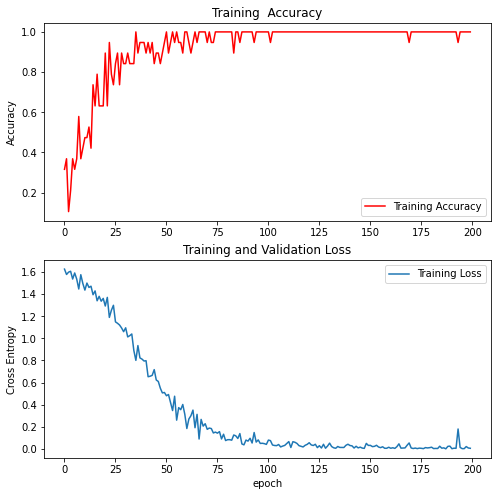

In [17]:
import matplotlib.pyplot as plt
# Accuracy and Loss vs Epochs
acc = history.history['accuracy']
 
loss = history.history['loss']
 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color ='r')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training  Accuracy')
 
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show() 

**Building useful features**

Great. We’ve trained our Deep Learning model, but now we have to create the actual features that would allow us to use our model in a chatbot application. For this next task, I’ve created a set of utility functions that would allow us to easily perform this task.

In [18]:
def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0]
  thresh = 0.2
  y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

  y_pred.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]])
  return return_list

def get_response(intents_list, intents_json): 
  tag = intents_list[0]
  list_of_intents = intents_json["intents"]
  for i in list_of_intents: 
    if i["tag"] == tag:
      result = random.choice(i["responses"])
      break
  return result

The next part is simple. We must create a while loop that allows a user to input some query which is then cleaned, meaning we take the tokens and lemmatize each word. After that, we convert our text to numeric values using our bag of words model and make a prediction of what tag in our intents the features best represent. From there, we would take a random response from our responses within that intents tag and use that to respond to the query.

In [19]:
# running the chatbot
while True:
    message = input("")
    intents = pred_class(message, words, classes)
    result = get_response(intents, data)
    print(result)

Hi How are you
1/1 [==============================] - 0s 87ms/step
Kippi
what is your name
1/1 [==============================] - 0s 20ms/step
Kippi
who are you
1/1 [==============================] - 0s 19ms/step
I'm Kippi
how old are you
1/1 [==============================] - 0s 20ms/step
03/07/1996
how old are you
1/1 [==============================] - 0s 19ms/step
03/07/1996


KeyboardInterrupt: ignored

**Conslusion:**


In this article, we explored transfer learning, with examples of how to use it to develop models for image classification. We used a pre-trained model MobileNet V2 for our case, you can use any pre-trained model you like. I hope you enjoyed it, thank you for reading!

**About Us**

We at Picaso Analytics offer various services in the field of Data Science and Analytics. We have worked with more than 30 clients from different parts of the world. We have worked on several projects involving concepts from NLP, Transfer Learning, Machine Learning, Deep Learning, Bayesian Optimization, Scientific Machine Learning, and Tableau dashboarding.

Check out our project section to know more: Projects

Reach out to us at 'picasoanalytics@gmail.com'

Connect with us on LinkedIn.